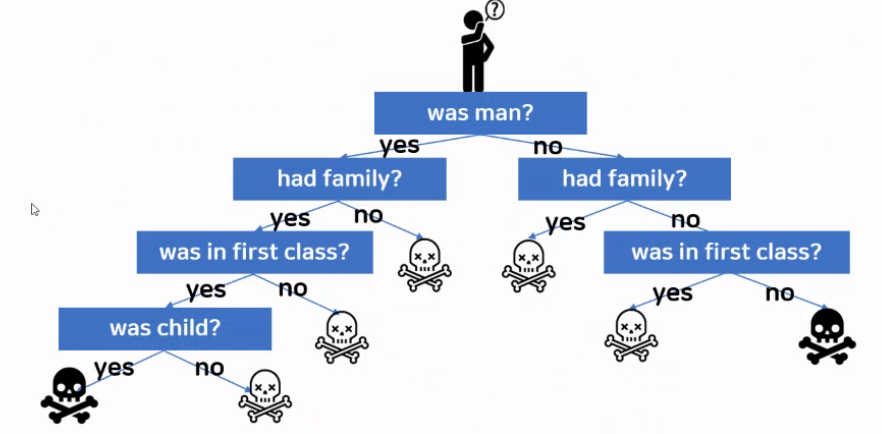
- 의사결정 트리 모델


In [11]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/train.csv', encoding = 'euc-kr')
test = pd.read_csv('data/test.csv', encoding = 'euc-kr')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


In [2]:
train = train[(train['Embarked'].notnull()) & (train['Fare'].notnull())]
train = pd.concat([train, pd.get_dummies(train['Sex'])], axis = 1)
test = pd.concat([train,pd.get_dummies(test['Sex'])], axis = 1)
train = pd.concat([train,pd.get_dummies(train['Embarked'])], axis = 1)
test = pd.concat([train,pd.get_dummies(test['Embarked'])], axis = 1)

In [3]:
del train['Name']
del test['Name']
del train['Cabin']
del test['Cabin']
del train['Age']
del test['Age']
del train['Sex']
del test['Sex']
del train['Embarked']
del test['Embarked']

In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   SibSp        889 non-null    int64  
 4   Parch        889 non-null    int64  
 5   Ticket       889 non-null    object 
 6   Fare         889 non-null    float64
 7   female       889 non-null    uint8  
 8   male         889 non-null    uint8  
 9   C            889 non-null    uint8  
 10  Q            889 non-null    uint8  
 11  S            889 non-null    uint8  
dtypes: float64(1), int64(5), object(1), uint8(5)
memory usage: 92.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 61
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1  

(None, None)

In [5]:
pd.set_option('display.max_rows',None)
train['Ticket'] = [str(i).split()[-1] for i in train['Ticket']]
train['Ticket'] = [int(i) if i != 'LINE' else i for i in train['Ticket']]
# test['Ticket'] = [str(i).split()[-1] for i in test['Ticket']]
# test['Ticket'] = [int(i) if (i != 'LINE') | (i is np.nan) else i for i in test['Ticket']]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 61
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Pclass       889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   Ticket       889 non-null    object 
 6   Fare         889 non-null    float64
 7   female       889 non-null    float64
 8   male         889 non-null    float64
 9   C            889 non-null    float64
 10  Q            889 non-null    float64
 11  S            889 non-null    float64
 12  C            890 non-null    uint8  
 13  Q            890 non-null    uint8  
 14  S            890 non-null    uint8  
dtypes: float64(11), object(1), uint8(3)
memory usage: 93.0+ KB


In [6]:
train.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,1.000000,-0.005028,-0.035330,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
SibSp,-0.057686,-0.034040,0.081656,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
female,-0.043136,0.541585,-0.127741,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
male,0.043136,-0.541585,0.127741,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
C,-0.001208,0.169966,-0.245733,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613
Q,-0.033694,0.004536,0.220558,-0.026692,-0.081585,-0.116684,0.075217,-0.075217,-0.148646,1.000000,-0.499261


In [7]:
print(train.describe())

       PassengerId    Survived      Pclass       SibSp       Parch  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586    0.524184    0.382452   
std     256.998173    0.486260    0.834700    1.103705    0.806761   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     224.000000    0.000000    2.000000    0.000000    0.000000   
50%     446.000000    0.000000    3.000000    0.000000    0.000000   
75%     668.000000    1.000000    3.000000    1.000000    0.000000   
max     891.000000    1.000000    3.000000    8.000000    6.000000   

             Fare      female        male           C           Q           S  
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000  
mean    32.096681    0.350956    0.649044    0.188976    0.086614    0.724409  
std     49.697504    0.477538    0.477538    0.391710    0.281427    0.447063  
min      0.000000    0.000000    0.000000    0.00

In [8]:
print(test.describe())

       PassengerId    Survived      Pclass       SibSp       Parch  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586    0.524184    0.382452   
std     256.998173    0.486260    0.834700    1.103705    0.806761   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     224.000000    0.000000    2.000000    0.000000    0.000000   
50%     446.000000    0.000000    3.000000    0.000000    0.000000   
75%     668.000000    1.000000    3.000000    1.000000    0.000000   
max     891.000000    1.000000    3.000000    8.000000    6.000000   

             Fare      female        male           C           Q           S  \
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000   
mean    32.096681    0.350956    0.649044    0.188976    0.086614    0.724409   
std     49.697504    0.477538    0.477538    0.391710    0.281427    0.447063   
min      0.000000    0.000000    0.000000    

In [9]:
X = train.loc[:, ['Pclass','SibSp', 'Parch', 'Ticket', 'female', 'male', 'C', 'Q', 'S']]

y = train.loc[:,'Fare']
# A = test.loc[:, ['Pclass','Sex','Fare','Embarked']]
# A = A[A['Fare'].isnull()]
# del A['Fare']
# A

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

#1
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
    train_acc= []
    test_acc = []

    neighbor = range(1, 20, 2)
    for j in neighbor :
        knn_model = KNeighborsRegressor(n_neighbors = j)
        knn_model.fit(X_train, y_train)
        pred_train = knn_model.predict(X_train)
        pred_test = knn_model.predict(X_test)
        mae_train = mean_absolute_error(pred_train,y_train)
        mae_test = mean_absolute_error(pred_test, y_test)
        train_acc.append(mae_train)
        test_acc.append(mae_test)

    plt.plot(neighbor, train_acc, c = 'b', label = 'Train')
    plt.plot(neighbor, test_acc, c = 'r', label = 'Test')
    plt.xticks(neighbor, labels = neighbor)
    plt.xlabel('K-neighbors')
    plt.ylabel('mean_abs_err')
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.title(f'KNN model with titanic Fare({i})')
    plt.show()

ValueError: could not convert string to float: 'LINE'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


neighbor = range(1, 20, 2)

knn_model = KNeighborsRegressor(n_neighbors = 7)
knn_model.fit(X_train, y_train)
pred_fare = knn_model.predict(A)[0]
print(pred_fare)

In [ ]:
X = train.loc[:, ['Pclass', 'Sex', 'Fare', 'Embarked']]
y = train.loc[:,['Survived']]
A = test.loc[:, ['Pclass', 'Sex', 'Fare', 'Embarked']]
X.info(),y.info(),A.info()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)
train_acc= []
test_acc = []

neighbor = range(1, 20, 2)
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
knn_model.predict(X_test)

plt.plot(neighbor, train_acc, c = 'b', label = 'Train')
plt.plot(neighbor, test_acc, c = 'r', label = 'Test')
plt.xticks(neighbor, labels = neighbor)
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper right')
plt.grid()
plt.title(f'KNN model with titanic Survived({i})')
plt.show()